# Semana 2 - Videoula Ajustes | Modelagem e Inferência Estatística – PES310

# Exercício 1
A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos veículos disponíveis que apresente algumas informações importantes para treinar os novos vendedores. 
A base de dados foi criada em um documento de texto e contém as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir a velocidade de 100km/h: cemm. 
*   Número de cilindros: nu_cy. 
*   Tipo de motor, aspirado (0) ou turbo (1): Etype.


Após ter realizado a análise dos dados apresentados, obter as equações da reta de mínimos quadrados para prever o consumo de combustível padrão de acordo com a capacidade volumétrica, e, se necessário, separe os dados de acordo com o tipo de motor.


In [1]:
#@title Importar a base de dados
#upload carst.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import files
# uploaded = files.upload()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Verificar se os dados foram importados
# print (uploaded['carst.csv'][:200].decode('utf-8') + '...')

In [3]:
#Observar os dados
import io
#import pandas as pd
df = pd.read_csv('../files/carst.csv')
df.head(30)


,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [4]:
#@title tratamento de dados 
df1 = pd.DataFrame(data=df)
c0=df1["brand/model/year"]
c1=df1["cap_vol"]
c2=df1["consumo"]
c3=df1["power"]
c4=df1["weight"]
c5=df1["cemm"]
c6=df1["nu_cy"]
c7=df1["Etype"]

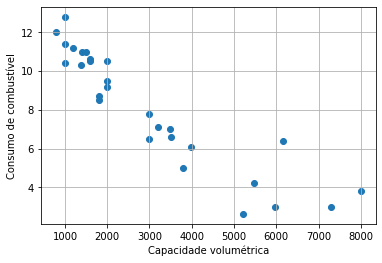

In [5]:
# Consumo vs. potência para todos os carros 
df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df1['cap_vol'],df1['consumo'])
plt.xlabel('Capacidade volumétrica');
plt.ylabel('Consumo de combustível')
plt.grid(True)
plt.show()

# Obter a equação da reta de mínimos quadrados - Opção 1
$y= \beta_0 + \beta_1 x_1$  
onde:

$\hat{\beta_1}=\frac{S_xy}{S_xy} $

$\beta_0=\bar{y}-\hat{\beta_1}x_i $

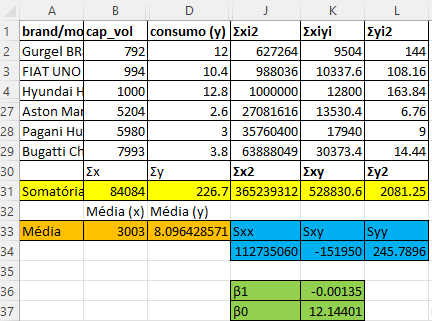

Estimated coefficients:
b_0 = 12.144010117932384            
b_1 = -0.0013478460028317721


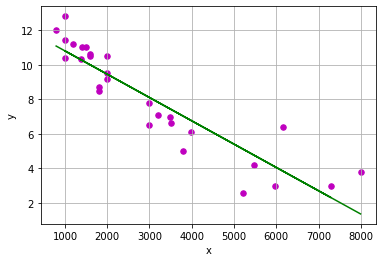

In [6]:
# fonte: Adaptado de https://github.com/OpenGenus/quark/blob/master/code/code/artificial_intelligence/src/Linear_Regression/linear_regression.py
#import numpy as np
#import matplotlib.pyplot as plt
def estimate_coef(x, y):
    # Número de amostras
    n = np.size(x)
 
    # média dos valores x e y
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # Calculo da relação cruzada e correlação de x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # Aplicar as fórmulas para obter os parÂmetros beta 0 e beta 1
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

 #criar gráfico para observar o resultado
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.grid(True)
    plt.show()
 
def main():
    # definir os dados (variáveis) x e y
    x= df['cap_vol']  # capacidade volumêtrica, variável preditora
    y= df['consumo'] # consumo, variável resposta  
 
 
    # estimar os coeficientes ou parâmetros
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotar a curva de regressão linear
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

## Observar os dados com a reta obtida 

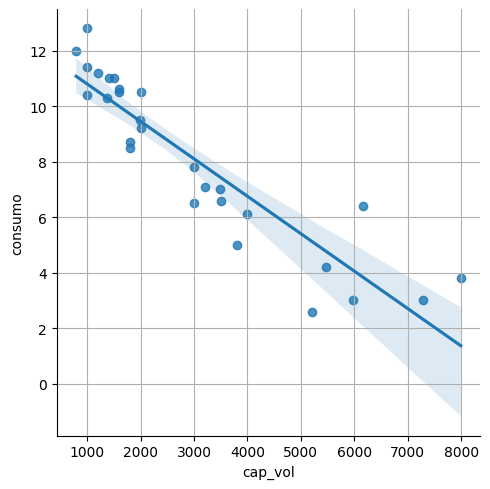

In [7]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='cap_vol', y='consumo', data=df);plt.grid(True)

## Criar duas bases de dados para motor aspirado e motor turbo

/home/eliabe/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eliabe/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


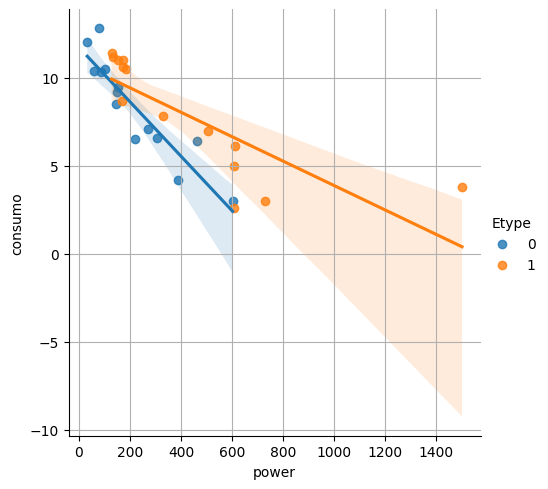

In [8]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='power', y='consumo',hue='Etype', data=df1);plt.grid(True)

## Obter a Equação da reta de regressão para os subconjuntos de dados

### Equação da reta Consumo vs. Potência - Todos os motores
Considerando todos os carros:
$y= \beta_0 + \beta_1 x_1$  

$y= 12,14401  -0.00135 x_1$  



### Equação da reta Consumo vs. Potência - Motor Aspirado
Considerando os carros com motor aspirado:

$y= \beta_0 + \beta_1 x_1$  

$y= 11.72962 - 0.0012593 x_1$  



### Equação da reta Consumo vs. Potência  - Motor Turbo
Considerando os carros com motor turbo:

$y= \beta_0 + \beta_1 x_1$  

$y= 12.320915 -0.001429x_1$  


# Obter a equação da reta de mínimos quadrados - Opção 2
$y= \beta_0 + \beta_1 x_1$  

In [9]:
#usando numpy
y = c2
#definir a vriável preditora
x = c1
z = np.polyfit(x,y,1)
print('y= {0} {1}x'.format(z[1],z[0]))

y= 12.144010117932384 -0.0013478460028317726x


# Obter a equação da reta de mínimos quadrados - Opção 3
$y= \beta_0 + \beta_1 x_1$  

In [10]:
#usando statsmodels.api
#https://www.statology.org/sst-ssr-sse-in-python/
import statsmodels.api as sm
#definir a variável resposta
y = df1['consumo']
#definir a variável preditora
x = df1[['cap_vol']]
#adicionar uma constante preditora
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit() #atenção esta variável será usada no IC
print(modelo.summary())
# mais infomrações https://www.statsmodels.org/stable/index.html


                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.30e-11
Time:                        16:44:39   Log-Likelihood:                -45.064
No. Observations:                  28   AIC:                             94.13
Df Residuals:                      26   BIC:                             96.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1440      0.427     28.435      0.0

In [11]:
import statsmodels.api as sm
dfmo = pd.DataFrame(modelo.summary().tables[1].data)
# Select first row as column names:
dfmo.columns = dfmo.iloc[0, :]
# Select first column as row names
dfmo.index = dfmo.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
dfmo = dfmo.iloc[1:, 1:]
# Print relevant info only
print(dfmo.iloc[:,[0, 1, 4, 5]])

0              coef    std err     [0.025     0.975]
                                                    
const       12.1440      0.427     11.266     13.022
cap_vol     -0.0013      0.000     -0.002     -0.001


##Calcular os valores esperados de Y
$\hat{y}_i=\hat{\beta_0} + \hat{\beta_1} x_i$ 

In [12]:
#obter os valores esperados de y
#$\hat{y}_i=\hat{\beta_0} + \hat{\beta_1} x_i$ 
ychapeu= modelo.fittedvalues
ychapeu
dfy = pd.DataFrame(data=ychapeu)
dfy

,0
0,11.076516
1,10.804251
2,10.796164
3,10.300157
4,9.990152
5,9.723279
6,9.452362
7,9.449666
8,8.105863
9,7.834946


## Calcular os resíduos

In [13]:
#resíduos
res=ychapeu-c2
res

0    -0.923484
1     0.404251
2    -2.003836
3     0.000157
4    -0.509848
5     1.223279
6    -0.047638
7     0.249666
8     1.605863
9     0.734946
10    0.829245
11    0.583423
12   -2.561417
13   -0.683135
14   -0.602488
15   -0.672057
16   -0.741626
17   -0.875063
18   -0.609848
19    1.020583
20   -1.048986
21    0.307211
22    0.435984
23    2.023543
24    0.676887
25    2.529820
26    1.083891
27   -2.429323
dtype: float64

## Calcular o quadrado do resíduo

In [14]:
# Quadra dos resíduos
res2=res**2
res2

0     8.528225e-01
1     1.634190e-01
2     4.015358e+00
3     2.458187e-08
4     2.599448e-01
5     1.496411e+00
6     2.269412e-03
7     6.233309e-02
8     2.578798e+00
9     5.401463e-01
10    6.876469e-01
11    3.403825e-01
12    6.560857e+00
13    4.666735e-01
14    3.629918e-01
15    4.516609e-01
16    5.500098e-01
17    7.657356e-01
18    3.719143e-01
19    1.041590e+00
20    1.100372e+00
21    9.437881e-02
22    1.900821e-01
23    4.094727e+00
24    4.581765e-01
25    6.399987e+00
26    1.174820e+00
27    5.901610e+00
dtype: float64

In [16]:
#@title Observar os valores em tabela
from tabulate import tabulate
df_yo = pd.DataFrame(c2).T
df_ych = pd.DataFrame(dfy).T
df_ycho = pd.DataFrame(res).T
df_ycho2 = pd.DataFrame(res2).T
table = [df_yo,df_ych,df_ycho,df_ycho2]
print(tabulate(table))

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name 'Iterable' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
#@title Calcular SQE e SQT Alternativa 1
#Adaptado de https://www.statology.org/sst-ssr-sse-in-python/
import numpy as np

#calcular SQE--> Baseado nos valores esperados
sqe = np.sum((ychapeu - df.consumo)**2)
print("SQE=", sqe)

#calcular SQT-->Baseado nos valores observados
sqt = np.sum((c2 - df.consumo.mean())**2)
print("SQT=", sqt)

#calcular SQR
sqr = sqt - sqe
print("SQR=",sqr)



SQE= 40.98511664985651
SQT= 245.78964285714284
SQR= 204.80452620728633


# Calcular o coeficiente de determinação $r^2$

In [ ]:
r2=1-sqe/sqt
print("coeficiente de determinação=",r2, "ou",r2*100, "%")

coeficiente de determinação= 0.8332512461736324 ou 83.32512461736324 %


# Calcular variância estimada $s^2$ e devio padrão estimado $s$

In [ ]:
# variância estimada $s^2$ e desvio padrão estimado $s^2$
s2=sqe/(len(c2)-2)
s=pow(s2,1/2)
print('variância estimada= {0}, desvio padrão estimado= {1}'.format(s2,s))

variância estimada= 1.5763506403790966, desvio padrão estimado= 1.2555280324943352


Na sequência observe uma nova alternativa para calcular as variáveis $S_{xx},S_{xy},S_{yy}$ e o coeficiente de correlação (como plus) em uma única função.

In [ ]:
#O seguinte código pode também ser usado previamente para calcular SQE, SQT, SQR e r2 (Alternativa 2)
# fonte: Adaptado de https://www.geeksforgeeks.org/sum-function-python/
def linreg(X, Y):
    """
    retorna a solução b0 e b1 para a reta y = b0 + b1x e todas as somatórias necessárias
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x           # Somatória do termos x
        Sy = Sy + y           # Somatória do termos y
        Sxx = Sxx + x*x       # Somatória do termos x^2
        Syy = Syy + y*y       # Somatória do termos y^2
        Sxy = Sxy + x*y       # Somatória do termos x vezes y
    det = Sxx * N - Sx * Sx   # variável auxiliar
    Sxxt= Sxx - Sx*Sx/N       # Termo Sxx
    Sxyt= Sxy - Sx*Sy/N       # Termo Sxy  
    Syyt= Syy - Sy*Sy/N       # Termo Syy  
    r=Sxyt/pow((Sxxt*Syyt), 1/2)
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det, Sx, Sy, Sxx,  Syy , Sxy, Sxxt, Sxyt, Syyt,r


In [ ]:
#Mostrar os resultados
b1,b0,sox,soy,sox2,soy2,soxy,sxx,sxy,syy,corr = linreg(df1['cap_vol'],df1['consumo'])  #
print('b0= {0},b1= {1}'.format(b0,b1))
print('Somatória x= {0}, Somatória y= {1},Somatória xy= {2}'.format(sox,soy,soxy))
print('Somatória x^2= {0}, Somatória y^2= {1}'.format(sox2,soy2))
print('Sxx= {0}, Syy {1}, Sxy {2}'.format(sxx,syy,sxy))
print('r= {0}'.format(corr))

b0= 12.14401011793238,b1= -0.0013478460028317728
Somatória x= 84084.0, Somatória y= 226.7,Somatória xy= 528830.6
Somatória x^2= 365239312.0, Somatória y^2= 2081.25
Sxx= 112735060.0, Syy 245.78964285714324, Sxy -151949.5
r= -0.912825967078956


Observe que o coeficiente de correlação $r=-0.91$
Observe que o coeficiente de determinação $r^2=0.8325$

## SQE e SQT Alternativa 2
Visto que os valores de Sxx, Syy e Sxy estão disponíveis, pode se também usar a simples susbtituição nas respectivas fórmulas de SQE e SQT


In [ ]:
#SQE e SQT Alternativa 2
sqe=syy-b1*sxy
sqt=syy
sqr=sqt-sqe
sqe,sqt,sqr
print('SQE= {0}, SQT {1}, SQR {2}'.format(sqe,sqt,sqr))

SQE= 40.985116649856764, SQT 245.78964285714324, SQR 204.80452620728647


#Verificar o intervalo de confiança de $\beta_1$

Considerando a reta obtida dos dados de todos os motores $y= 12,14401  -0.00135 x_1$.

Para finalizar, calcular o **erro padrão de ${\beta_1}$** com a seguinte equação

$s_{\hat{\beta_1}}=\frac{s}{\sqrt{S_{xx}}}$


In [ ]:
ebeta=s/pow(sxx,1/2)
ebeta

0.00011824884667786773

## Probabilidade t-student e intervalo de confiança 

In [ ]:
import statsmodels.api as sm
# Automatic calculation
lm_fit = modelo#sm.OLS(y, x_mat).fit()
# dir(lm_fit)
# Get the summary table with coefficients and other statistics
df = pd.DataFrame(lm_fit.summary().tables[1].data)
# Select first row as column names:
df.columns = df.iloc[0, :]
# Select first column as row names
df.index = df.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
df = df.iloc[1:, 1:]
# Print relevant info only
print(df.iloc[:,[0, 1, 4, 5]])

0              coef    std err     [0.025     0.975]
                                                    
const       12.1440      0.427     11.266     13.022
cap_vol     -0.0013      0.000     -0.002     -0.001


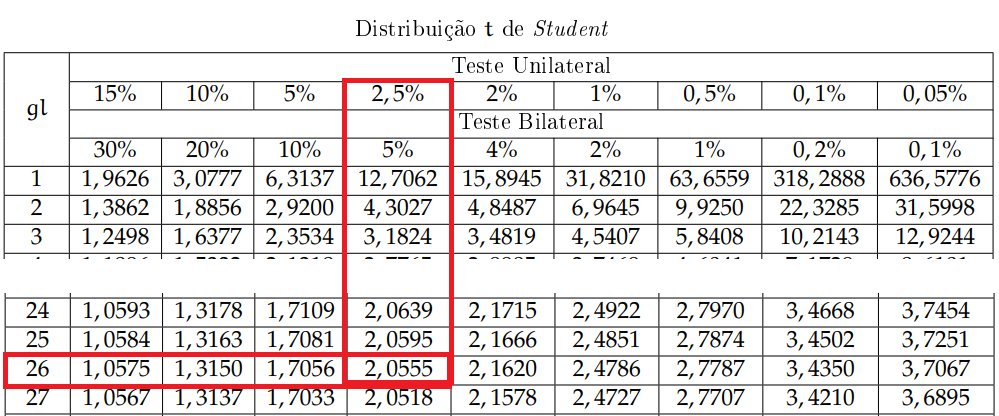

In [ ]:
#usar a tabela tstudent t0,025:N-2
from scipy.stats import t
alpha = 0.05  # nÍvel de significia = 5% 
df = len(c2) - 2  # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
print(f'v: {v}') 

v: 2.055529438642871


In [ ]:
#Finalmente calcular o IC de b1
ICbeta1= b1+v*ebeta
ICbeta2= b1-v*ebeta
ICbeta2,ICbeta1,b1,v,ebeta
print('O intevalo de confiança é {0} < b1 < {1}'.format(ICbeta2,ICbeta1))

O intevalo de confiança é -0.0015909099882636972 < b1 < -0.0011047820173998484
